## En este Notebook se construye un Modelo predictivo usando árboles de decisión (Decision Trees) y también con Random Forest


In [71]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 200
import pickle




In [41]:
df = pd.read_csv('df_clean_4.csv')


In [42]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [43]:
features_response = df.columns.tolist()

In [44]:
items_to_remove = ['ID', 'PAY_2', 'PAY_3',\
'PAY_4', 'PAY_5', 'PAY_6',\
'EDUCATION_CAT', 'graduate school',\
'high school', 'none',\
'others', 'university']

In [45]:
features_response = [item for item in features_response if item not in
items_to_remove]
features_response

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [46]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [47]:
X_train, X_test, y_train, y_test = \
train_test_split(df[features_response[:-1]].values,
df['default payment next month'].values,
test_size=0.2, random_state=24)

In [48]:
dt = tree.DecisionTreeClassifier()

### Usaremos GridSearchCV para testear en una grilla de hiperparámetros , usando cross-validation

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
X_train.shape

(21331, 18)

Lista (diccionario) de hiperparámetros max_depth (profundidad de árbol a probar):

In [20]:
params = {'max_depth':[1, 2, 4, 6, 8, 10, 12]}

In [21]:
cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc',
n_jobs=None, refit=True, cv=4, verbose=1,
pre_dispatch=None, error_score=np.nan,
return_train_score=True)

In [22]:
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    4.2s finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             pre_dispatch=None, return_train_score=True, scoring='roc_auc',
             verbose=1)

cross-validation results

In [23]:
cv_results_df = pd.DataFrame(cv.cv_results_)

In [24]:
cv_results_df 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.032133,0.012324,0.005518,0.006400,1,{'max_depth': 1},0.639514,0.643398,0.651891,0.650753,0.646389,0.005136,7,0.648680,0.647384,0.644553,0.644934,0.646388,0.001712
1,0.059783,0.005461,0.001994,0.001994,2,{'max_depth': 2},0.695134,0.699022,0.713376,0.699510,0.701761,0.006917,5,0.704034,0.702700,0.698113,0.702535,0.701845,0.002232
2,0.094741,0.001735,0.007811,0.007811,4,{'max_depth': 4},0.732720,0.741078,0.746946,0.743731,0.741119,0.005276,2,0.756882,0.752421,0.749368,0.753055,0.752932,0.002673
3,0.143815,0.003460,0.000999,0.001730,6,{'max_depth': 6},0.744480,0.745673,0.750853,0.741448,0.745614,0.003395,1,0.782202,0.780125,0.775228,0.774750,0.778076,0.003178
4,0.179649,0.007805,0.003906,0.006765,8,{'max_depth': 8},0.727582,0.731350,0.752006,0.730802,0.735435,0.009675,3,0.811862,0.808353,0.803554,0.802431,0.806550,0.003788
5,0.218786,0.000174,0.003906,0.006766,10,{'max_depth': 10},0.707582,0.703608,0.719963,0.714497,0.711413,0.006289,4,0.849815,0.854772,0.841046,0.836557,0.845548,0.007148
6,0.250755,0.000887,0.000000,0.000000,12,{'max_depth': 12},0.672456,0.657138,0.676903,0.680969,0.671867,0.009021,6,0.888890,0.904080,0.885447,0.876138,0.888639,0.010062


Text(0, 0.5, 'ROC AUC')

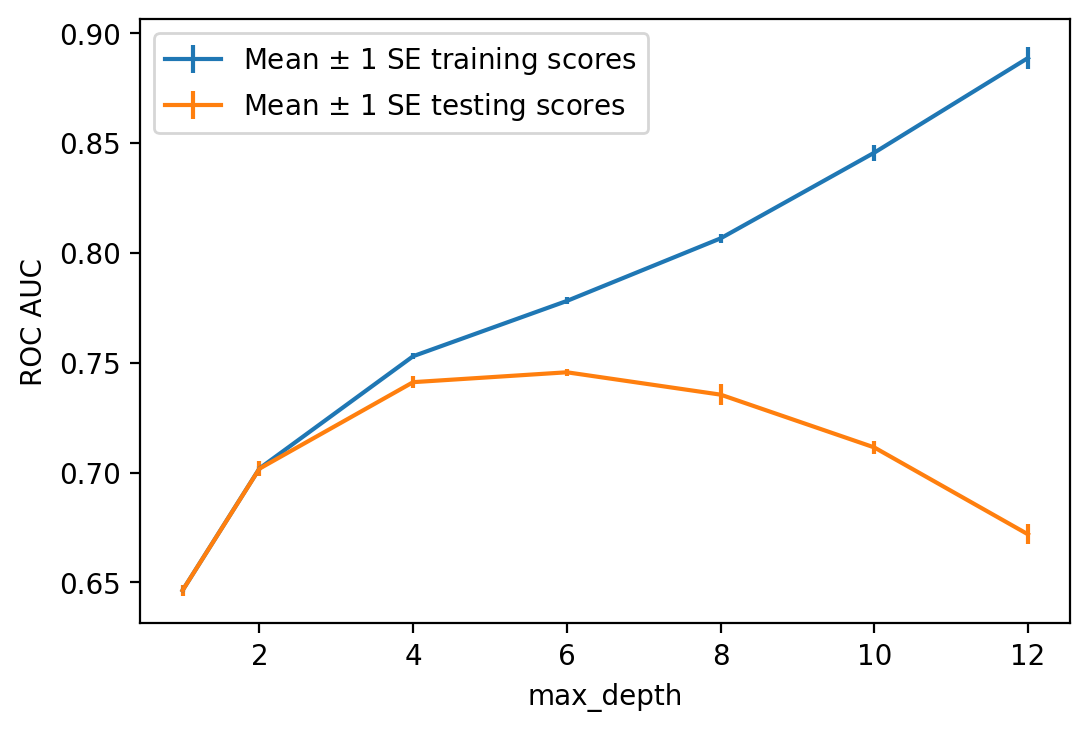

In [25]:
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
cv_results_df['mean_train_score'],
yerr=cv_results_df['std_train_score']/np.sqrt(4),
label='Mean $\pm$ 1 SE training scores')
ax.errorbar(cv_results_df['param_max_depth'],
cv_results_df['mean_test_score'],
yerr=cv_results_df['std_test_score']/np.sqrt(4),
label='Mean $\pm$ 1 SE testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')

### Habíamos obtenido un promedio de testeo  ROC AUC de  0.738  con regresion logistica.Con árbol de decisión obtenemos 0.746.  Hubo un mejoramiento en la performance.

## Random Forests

En random Forest se combinan diferentes árboles para formar un modelo más potente. Veremos si podemos mejorar el score anterior.

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf = RandomForestClassifier(n_estimators=10,\
criterion='gini',\
max_depth=3,\
min_samples_split=2,\
min_samples_leaf=1,\
min_weight_fraction_leaf=0.0,\
max_features='auto',\
max_leaf_nodes=None,\
min_impurity_decrease=0.0,\
min_impurity_split=None,\
bootstrap=True,\
oob_score=False,\
n_jobs=None,
random_state=4,\
verbose=0,\
warm_start=False,\
class_weight=None)

#### Crearemos una grilla de valores para optimizar en el número de árboles a utilizar.

In [28]:
rf_params_ex = {'n_estimators':list(range(10,110,10))}

In [29]:
rf_params_ex

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

#### Volvemos a usar GridSearchCV:

In [30]:
cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex,
scoring='roc_auc', n_jobs=None,
refit=True, cv=4, verbose=1,
pre_dispatch=None, error_score=np.nan,
return_train_score=True)

In [31]:
cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   36.6s finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=4),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             pre_dispatch=None, return_train_score=True, scoring='roc_auc',
             verbose=1)

Resultados

In [32]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)

In [33]:
cv_rf_ex_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.145891,0.006097,0.011724,0.006769,10,{'n_estimators': 10},0.737907,0.750682,0.768476,0.767800,0.756216,0.012751,10,0.767037,0.764563,0.758841,0.763674,0.763529,0.002974
1,0.286096,0.016785,0.015623,0.000001,20,{'n_estimators': 20},0.742705,0.755361,0.774591,0.770942,0.760900,0.012748,5,0.771544,0.771216,0.764458,0.766441,0.768415,0.003049
2,0.416828,0.009487,0.019535,0.006759,30,{'n_estimators': 30},0.741780,0.755140,0.775282,0.769325,0.760382,0.012995,7,0.770703,0.771949,0.763771,0.765974,0.768099,0.003349
3,0.557835,0.020171,0.019518,0.006747,40,{'n_estimators': 40},0.741560,0.753102,0.774940,0.769106,0.759677,0.013165,9,0.769863,0.770920,0.763447,0.764242,0.767118,0.003307
4,0.692674,0.006160,0.027336,0.006764,50,{'n_estimators': 50},0.743724,0.753654,0.775148,0.768949,0.760369,0.012391,8,0.771213,0.771930,0.763567,0.765230,0.767985,0.003643
5,0.821514,0.006998,0.034120,0.004376,60,{'n_estimators': 60},0.744554,0.753591,0.776005,0.769307,0.760864,0.012444,6,0.771868,0.773528,0.764194,0.765720,0.768828,0.003952
6,1.026253,0.065704,0.042312,0.006918,70,{'n_estimators': 70},0.745812,0.753161,0.777280,0.770440,0.761673,0.012693,4,0.772926,0.774367,0.764597,0.766738,0.769657,0.004092
7,1.190167,0.071190,0.057431,0.028034,80,{'n_estimators': 80},0.746222,0.752732,0.777407,0.770749,0.761777,0.012734,3,0.773315,0.773995,0.764558,0.766878,0.769687,0.004059
8,1.334153,0.153134,0.048870,0.003455,90,{'n_estimators': 90},0.746364,0.753299,0.777709,0.771849,0.762305,0.012880,2,0.773617,0.774262,0.765170,0.766970,0.770005,0.003993
9,1.575425,0.117163,0.055620,0.011257,100,{'n_estimators': 100},0.746659,0.752874,0.777776,0.772036,0.762336,0.012921,1,0.773984,0.774208,0.765233,0.767023,0.770112,0.004035


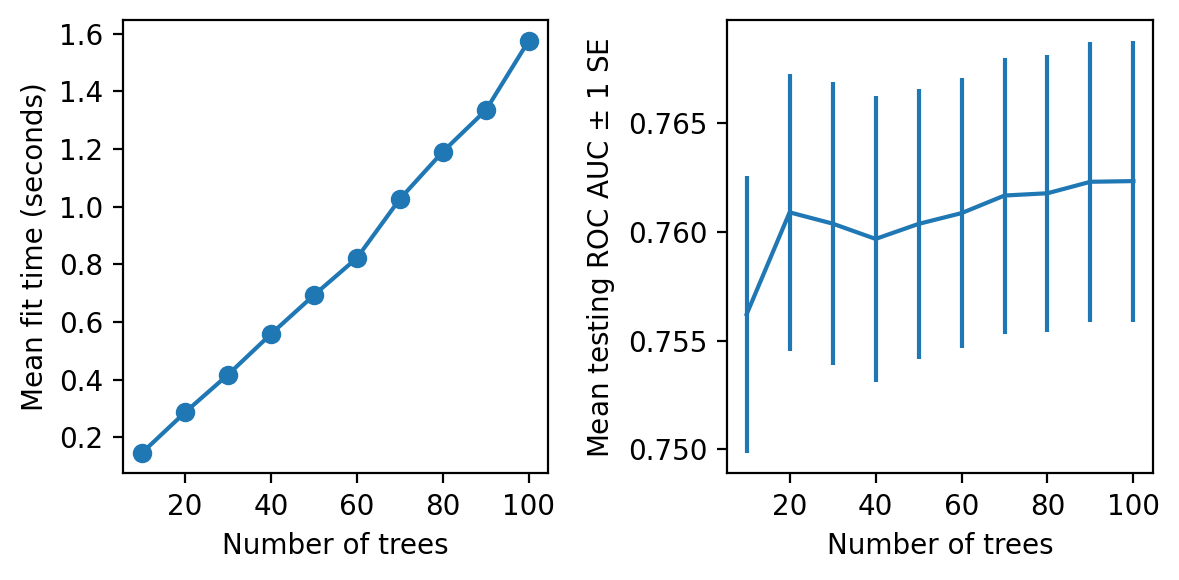

In [34]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
cv_rf_ex_results_df['mean_fit_time'],
'-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
cv_rf_ex_results_df['mean_test_score'],
yerr=cv_rf_ex_results_df['std_test_score']/np.sqrt(4))
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SE ')
plt.tight_layout()

El mejor parámetro y el mejor score:

In [35]:
cv_rf_ex.best_params_

{'n_estimators': 100}

In [37]:
cv_rf_ex_results_df['mean_test_score'].max()

0.7623364684736227

### Da un score de 0.762. El score anterior con árbol de decisión simple fue de 0.746

#### Crearemos un dataframe con las variables más importantes o decisorias según el mejor modelo

<AxesSubplot:>

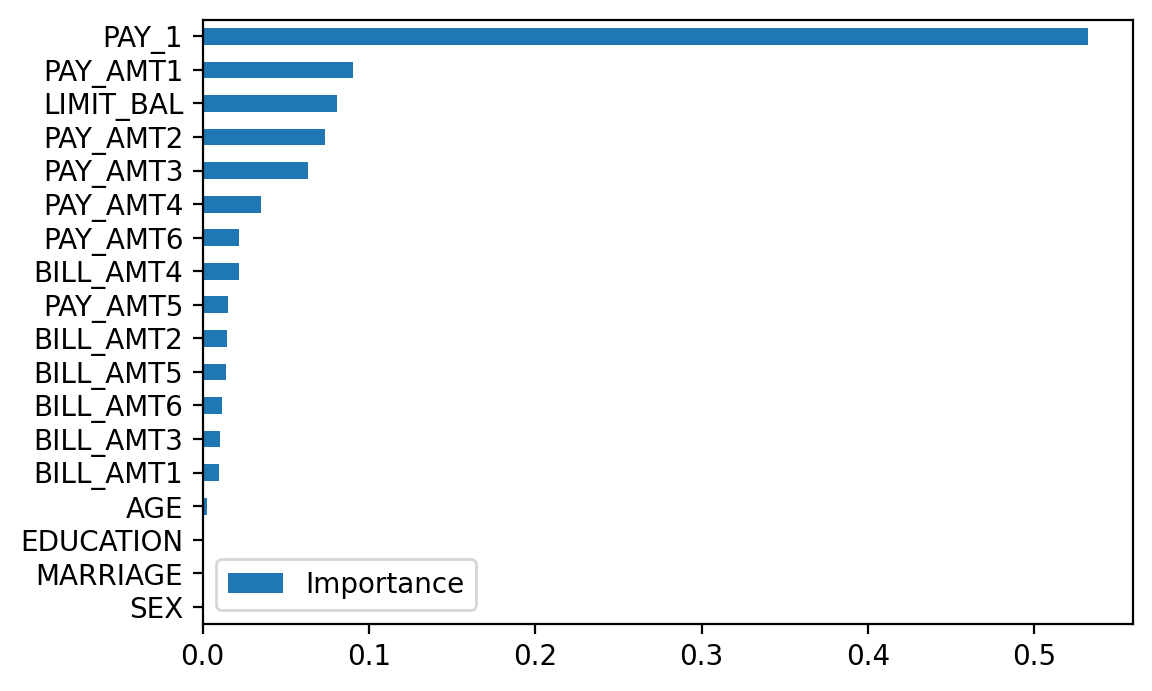

In [38]:
feat_imp_df = pd.DataFrame({
'Importance':cv_rf_ex.best_estimator_.feature_importances_
},
index=features_response[:-1])
feat_imp_df.sort_values('Importance', ascending=True).plot.barh()

El análisis de importancia de features coincide en líneas generales con el análisis de F-test que hicimos para Regresión Logística, sólo que  difiere en el segundo lugar de importancia que aquí es PAY_AMT1. En el caso de Regresión Logística fue LIMIT_BAl que aquí está en tercer lugar de importancia, aunque la diferencia numérica no es muy significativa

In [39]:
feat_imp_df

,Importance
LIMIT_BAL,0.080898
SEX,0.000083
EDUCATION,0.000911
MARRIAGE,0.000336
AGE,0.002696
PAY_1,0.532504
BILL_AMT1,0.009799
BILL_AMT2,0.014429
BILL_AMT3,0.010192
BILL_AMT4,0.021700


### Ahora repetiremos el proceso pero optimizando también sobre el hiperparámetro max_depth, es decir, la profundidad de cada árbol.

In [53]:
param_list={'n_estimators':[10,50,100,200],'max_depth':list(range(3,15,3))}

In [54]:
CV_rf= GridSearchCV( rf,param_grid=param_list, scoring='roc_auc',n_jobs=None,refit=True,cv=4,verbose=2,
                    pre_dispatch=None,error_score=np.nan,return_train_score=True)

In [55]:
CV_rf.fit(X_train,y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.2s
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ..................... max_depth=3, n_estimators=10, total=   0.2s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.2s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.7s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.8s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.7s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.7s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] .

[CV] ................... max_depth=12, n_estimators=100, total=   4.1s
[CV] max_depth=12, n_estimators=200 ..................................
[CV] ................... max_depth=12, n_estimators=200, total=   8.3s
[CV] max_depth=12, n_estimators=200 ..................................
[CV] ................... max_depth=12, n_estimators=200, total=   8.9s
[CV] max_depth=12, n_estimators=200 ..................................
[CV] ................... max_depth=12, n_estimators=200, total=   8.8s
[CV] max_depth=12, n_estimators=200 ..................................
[CV] ................... max_depth=12, n_estimators=200, total=   8.1s


[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:  3.0min finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=4),
             param_grid={'max_depth': [3, 6, 9, 12],
                         'n_estimators': [10, 50, 100, 200]},
             pre_dispatch=None, return_train_score=True, scoring='roc_auc',
             verbose=2)

resultados

In [56]:
CV_rf_results=pd.DataFrame(CV_rf.cv_results_)

In [57]:
CV_rf_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.150424,0.006454,0.006149,0.006583,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.737907,0.750682,0.768476,0.767800,0.756216,0.012751,16,0.767037,0.764563,0.758841,0.763674,0.763529,0.002974
1,0.706992,0.013175,0.029840,0.002427,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.743724,0.753654,0.775148,0.768949,0.760369,0.012391,14,0.771213,0.771930,0.763567,0.765230,0.767985,0.003643
2,1.399145,0.026494,0.057560,0.003944,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.746659,0.752874,0.777776,0.772036,0.762336,0.012921,13,0.773984,0.774208,0.765233,0.767023,0.770112,0.004035
3,2.791319,0.076411,0.097622,0.006770,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.747679,0.753130,0.778395,0.772583,0.762947,0.012855,12,0.774555,0.774005,0.766237,0.768271,0.770767,0.003591
4,0.239830,0.002110,0.010474,0.000498,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.751974,0.761400,0.784346,0.778201,0.768980,0.012921,10,0.803068,0.799958,0.793101,0.796370,0.798124,0.003745
5,1.167961,0.006054,0.032157,0.001588,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.758317,0.763263,0.787013,0.777501,0.771524,0.011383,8,0.807888,0.805195,0.798590,0.801325,0.803249,0.003561
6,2.325518,0.026445,0.061074,0.003997,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.759244,0.763879,0.787605,0.779451,0.772545,0.011473,7,0.808572,0.807001,0.800749,0.803357,0.804920,0.003062
7,4.777290,0.189254,0.121901,0.003921,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.759009,0.764524,0.787796,0.780238,0.772892,0.011607,6,0.808673,0.807112,0.800888,0.804302,0.805244,0.002963
8,0.332300,0.007765,0.014036,0.001623,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.754928,0.752836,0.780102,0.770288,0.764539,0.011231,11,0.860572,0.860318,0.855605,0.850453,0.856737,0.004132
9,1.702264,0.078269,0.051699,0.004978,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.762207,0.766809,0.791103,0.781656,0.775444,0.011550,3,0.872726,0.871733,0.871411,0.868043,0.870978,0.001763


In [58]:
CV_rf.best_params_   # mejores hiperparámetros

{'max_depth': 9, 'n_estimators': 100}

In [59]:
mask=(CV_rf_results.param_max_depth==9) & (CV_rf_results.param_n_estimators==200)

In [60]:
CV_rf_results[mask].mean_test_score

11    0.776257
Name: mean_test_score, dtype: float64

### El score es de 0.776. El anterior fue de 0.762. Hay un mejoramiento

## Features más importantes

In [63]:
feat_imp=pd.DataFrame({'Importance':CV_rf.best_estimator_.feature_importances_},index=features_response[:-1])

<AxesSubplot:>

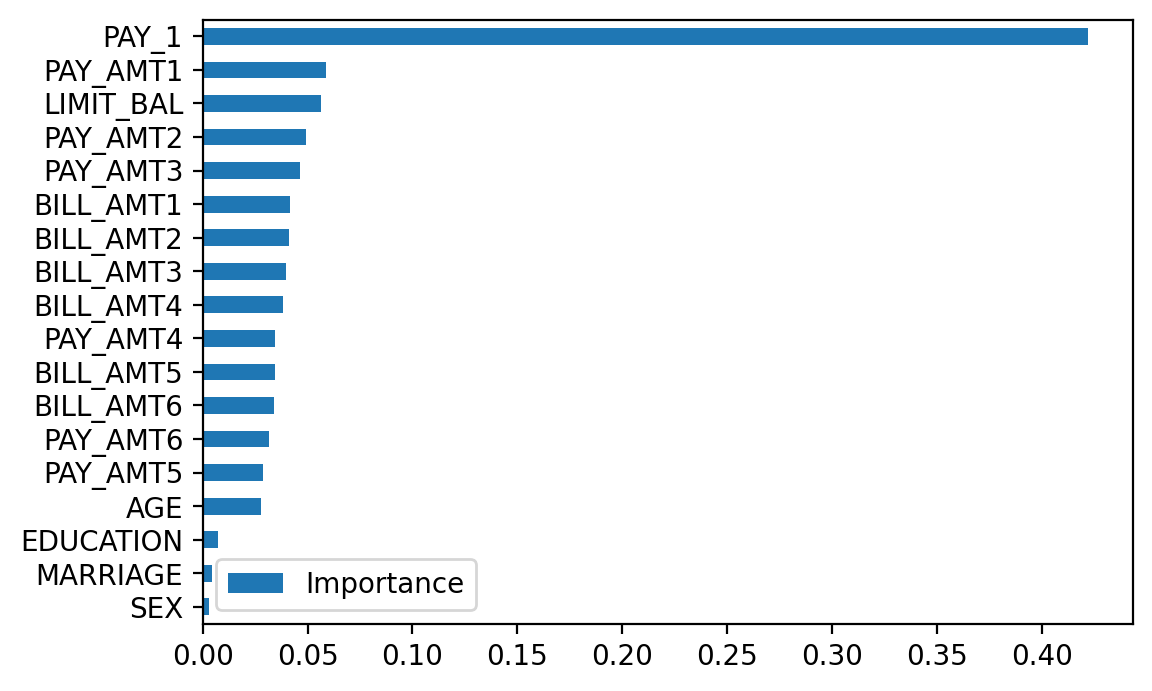

In [64]:
feat_imp.sort_values('Importance',ascending=True).plot.barh()

 Notar que el mejor modelo queda guardado como: CV_rf.best_estimator_

In [67]:
X=features_response[:-1]
y=features_response[-1]

In [68]:
CV_rf.best_estimator_.fit(df[X].values,df[y].values)

RandomForestClassifier(max_depth=9, random_state=4)

Este sería el paso final: entrenar el mejor modelo con todos los datos.

### Guardar modelo:

In [74]:
with open('CV_rf.best_estimator__w_data.pkl', 'wb') as f:
    pickle.dump([X_train, y_train,X_test, y_test,CV_rf.best_estimator_], f)

OBS: para reabrir modelo

In [ ]:
with open('CV_rf.best_estimator__w_data.pkl', 'rb') as f:
    X_train, y_train, X_test,\
    y_test, xgb_model = pickle.load(f)